# Load packages & data

In [1]:
import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat
import arviz as az

def preprocess(file_name):
    t, V = dl.deerload(file_name)
    V = dl.correctphase(V)
    t = dl.correctzerotime(V, t)
    
    return V, t

## Sample 1

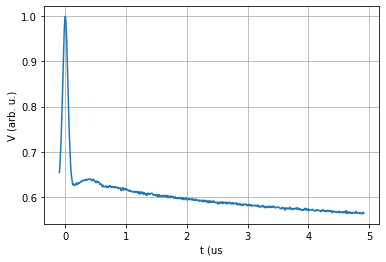

In [5]:
[V1_, t1_] = preprocess('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/ringtest_labB/sample1_labB.DSC')

# Cut off first point
t1=t1_[3:]
V1exp=V1_[3:]

# Cut off 2+1 artifact
cut = 0.8
V1exp = V1exp[t1<=max(t1)-cut]
t1 = t1[t1<=max(t1)-cut]

# Normalize
V1exp = V1exp/np.max(V1exp)

# Plot
plt.plot(t1,V1exp)
plt.xlabel('t (us')
plt.ylabel('V (arb. u.)')
plt.grid()

## Sample 2

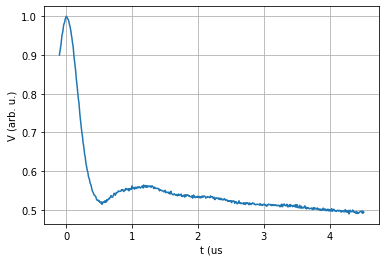

In [2]:
[V2_, t2_] = preprocess('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/ringtest_labB/sample2_labB.DSC')


# Cut off first point, shift zero time 
t2=t2_[1:]
V2exp=V2_[1:]
t2 = t2-(0.12-0.008)

# Cut off 2+1 artifact
cut = 1.2
V2exp = V2exp[t2<=max(t2)-cut]
t2 = t2[t2<=max(t2)-cut]

# Normalize
V2exp = V2exp/np.max(V2exp)

# Plot
plt.plot(t2,V2exp)
plt.xlabel('t (us')
plt.ylabel('V (arb. u.)')
plt.grid()

## Sample 3

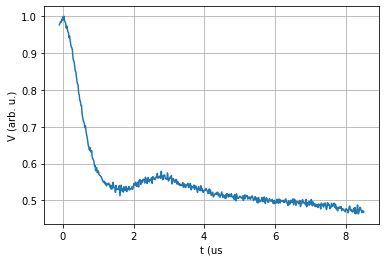

In [11]:
[V3_, t3_] = preprocess('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/ringtest_labB/sample3_labB.DSC')

# Cut off first point, shift zero time 
t3=t3_[1:]
V3exp=V3_[1:]
t3 = t3-(0.12-0.008)

# Cut off 2+1 artifact
cut = 1.2
V3exp = V3exp[t3<=max(t3)-cut]
t3 = t3[t3<=max(t3)-cut]

# Normalize
V3exp = V3exp/np.max(V3exp)

# Plot
plt.plot(t3,V3exp)
plt.xlabel('t (us')
plt.ylabel('V (arb. u.)')
plt.grid()

## Sample 4

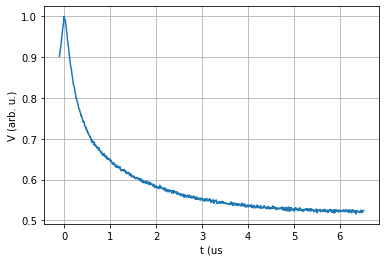

In [5]:
[V4_, t4_] = preprocess('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/ringtest_labB/sample4_labB.DSC')

# Cut off first point, shift zero time 
t4=t4_[1:]
V4exp=V4_[1:]
t4 = t4-(0.12-0.008)

# Cut off 2+1 artifact
cut = 1.2
V4exp = V4exp[t4<=max(t4)-cut]
t4 = t4[t4<=max(t4)-cut]

# Normalize
V4exp = V4exp/np.max(V4exp)

# Plot
plt.plot(t4,V4exp)
plt.xlabel('t (us')
plt.ylabel('V (arb. u.)')
plt.grid()

# Sample 1 Analysis

## *r*<sub>max</sub>=auto (8.15 nm)

In [33]:
pars = {"method": 'regularization', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"Bend"}

model_s1_rmaxauto_Bend_dr005 = dive.model(t1, V1exp, pars)

MCMCparameters = {"draws": 50000,"tune": 20000, "chains": 4, 'cores': 4, 'init':'adapt_full'}
nuts={'target_accept':0.90}
trace_s1_rmaxauto_dr005_4c_50s_20t = dive.sample(model_s1_rmaxauto_Bend_dr005,MCMCparameters,NUTSpars=nuts)

Time range:          627 points (dt=0.00798724) from -0.0968 µs to 4.9112 µs
Distance range:      132 points (dr=0.0503606) from 1.5 nm to 8.14759 nm
Model:              regularization


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>randTau_Bend_posterior: [tau]
>randDelta_posterior: [delta]
>randPnorm_Bend_posterior: [P]
>NUTS: [lamb, V0, Bend]


ValueError: Not enough samples to build a trace.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.020,0.001,0.017,0.022,0.000,0.000,16.0,107.0,1.19
$B_\mathrm{end}$,0.909,0.007,0.896,0.920,0.002,0.001,16.0,106.0,1.19
$λ$,0.381,0.003,0.376,0.387,0.001,0.001,17.0,106.0,1.17
$V_0$,1.001,0.001,0.999,1.003,0.000,0.000,201.0,1543.0,1.02
$σ$,0.003,0.000,0.002,0.003,0.000,0.000,490.0,833.0,1.01
$\mathrm{lg}(α)$,-0.984,0.073,-1.120,-0.847,0.001,0.000,15840.0,37334.0,1.00


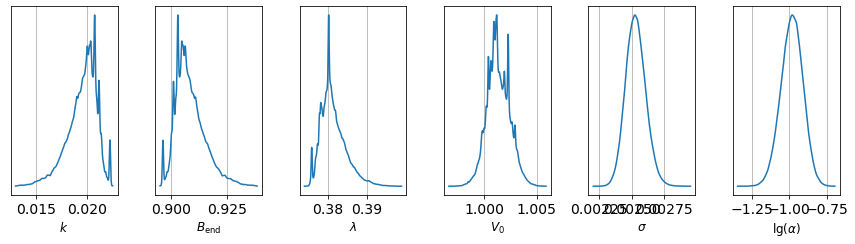

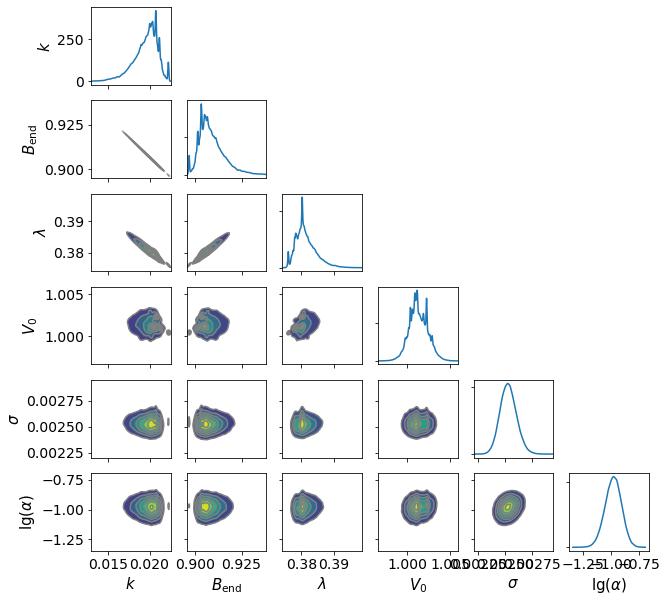

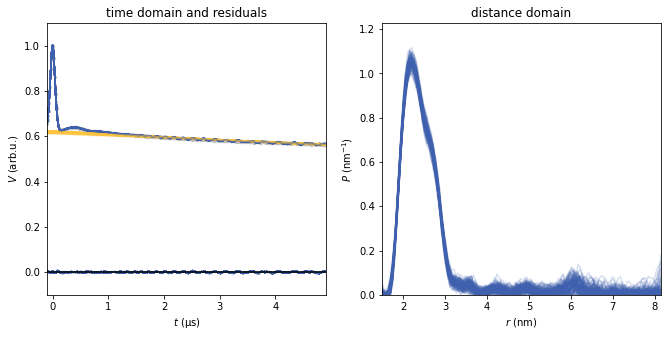

In [7]:
dive.summary(trace_s1_rmaxauto_dr005_4c_50s_20t,model_s1_rmaxauto_Bend_dr005)

In [8]:
pm.save_trace(trace_s1_rmaxauto_dr005_4c_50s_20t,'trace_s1_rmaxauto_dr005_4c_50s_20t_29132div_rhatkBend19_rhatlamb17.trace',overwrite=True)

'trace_s1_rmaxauto_dr005_4c_50s_20t_29132div_rhatkBend19_rhatlamb17.trace'

## *r*<sub>max</sub>= 7.5 nm

In [10]:
pars = {"method": 'regularization', "r": np.linspace(1.5,7.5,120),"rmax_opt":"user","bkgd_var":"Bend"}

model_s1_rmax75_Bend_dr005 = dive.model(t1, V1exp, pars)

MCMCparameters = {"draws": 50000,"tune": 20000, "chains": 4, 'cores': 4, 'init':'adapt_full'}
nuts={'target_accept':0.90}
trace_s1_rmax75_dr005_4c_50s_20t = dive.sample(model_s1_rmax75_Bend_dr005,MCMCparameters,NUTSpars=nuts)

Time range:          627 points (dt=0.00798724) from -0.0968 µs to 4.9112 µs
Distance range:      120 points (dr=0.05) from 1.5 nm to 7.5 nm
Model:              regularization


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>randTau_Bend_posterior: [tau]
>randDelta_posterior: [delta]
>randPnorm_Bend_posterior: [P]
>NUTS: [lamb, V0, Bend]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 20_000 tune and 50_000 draw iterations (80_000 + 200_000 draws total) took 1748 seconds.
The acceptance probability does not match the target. It is 0.9652770526461111, but should be

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.020,0.001,0.018,0.022,0.000,0.0,688.0,1023.0,1.0
$B_\mathrm{end}$,0.905,0.005,0.897,0.914,0.000,0.0,688.0,1023.0,1.0
$λ$,0.380,0.002,0.376,0.384,0.000,0.0,765.0,1112.0,1.0
$V_0$,1.001,0.001,0.999,1.004,0.000,0.0,16162.0,30032.0,1.0
$σ$,0.002,0.000,0.002,0.003,0.000,0.0,116818.0,174591.0,1.0
$\mathrm{lg}(α)$,-1.005,0.073,-1.143,-0.867,0.001,0.0,19491.0,39369.0,1.0


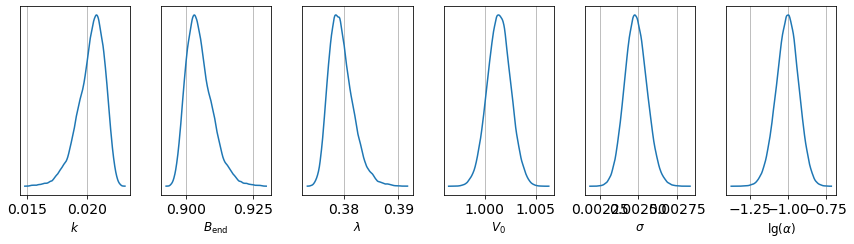

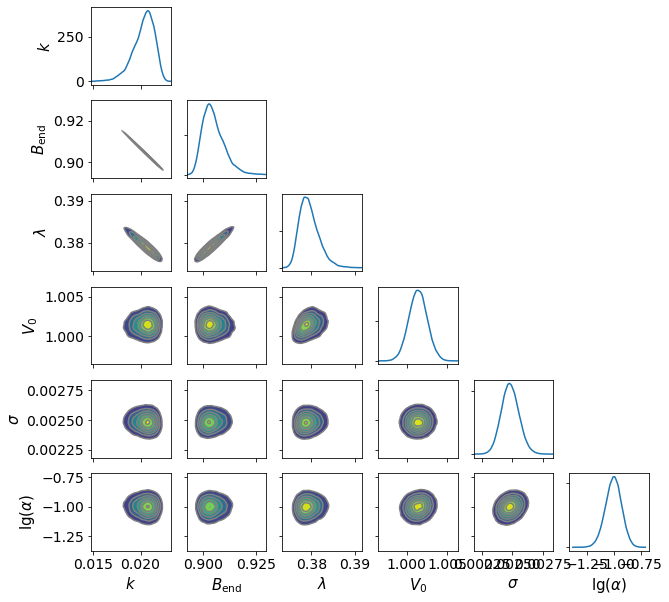

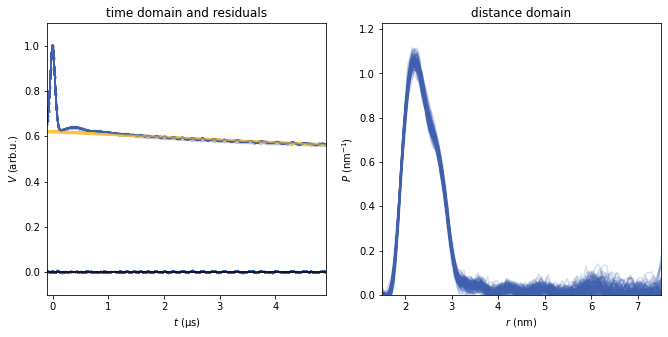

In [11]:
dive.summary(trace_s1_rmax75_dr005_4c_50s_20t,model_s1_rmax75_Bend_dr005)

In [12]:
pm.save_trace(trace_s1_rmax75_dr005_4c_50s_20t,'trace_s1_rmax75_dr005_4c_50s_20t_0div_rhat1.trace',overwrite=True)

'trace_s1_rmax75_dr005_4c_50s_20t_0div_rhat1.trace'

Time range:          627 points (dt=0.00798724) from -0.0968 µs to 4.9112 µs
Distance range:      120 points (dr=0.05) from 1.5 nm to 7.5 nm
Model:              regularization


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.020,0.001,0.018,0.022,0.000,0.0,688.0,1023.0,1.0
$B_\mathrm{end}$,0.905,0.005,0.897,0.914,0.000,0.0,688.0,1023.0,1.0
$λ$,0.380,0.002,0.376,0.384,0.000,0.0,765.0,1112.0,1.0
$V_0$,1.001,0.001,0.999,1.004,0.000,0.0,16162.0,30032.0,1.0
$σ$,0.002,0.000,0.002,0.003,0.000,0.0,116818.0,174591.0,1.0
$\mathrm{lg}(α)$,-1.005,0.073,-1.143,-0.867,0.001,0.0,19491.0,39369.0,1.0


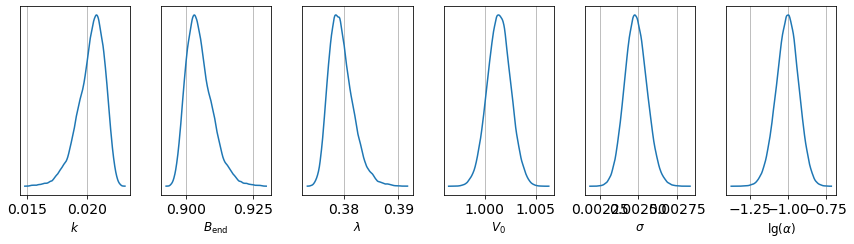

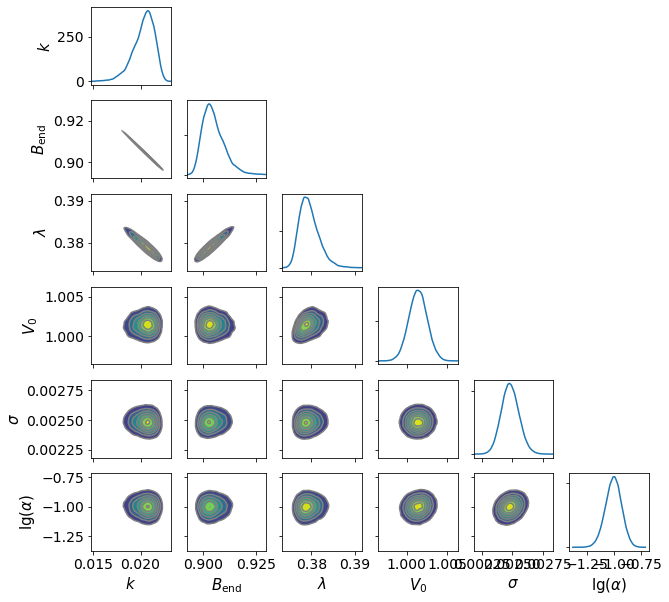

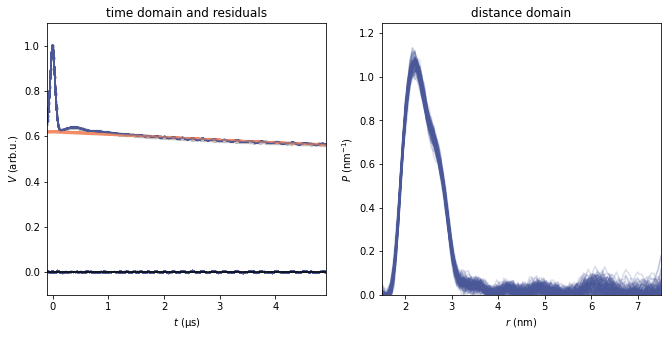

In [10]:
pars = {"method": 'regularization', "r": np.linspace(1.5,7.5,120),"rmax_opt":"user","bkgd_var":"Bend"}

model_s1_rmax75_Bend_dr005 = dive.model(t1, V1exp, pars)

trace_s1_rmax75 = pm.load_trace('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/Figure4/trace_s1_rmax75_dr005_4c_50s_20t_0div_rhat1.trace',model=model_s1_rmax75_Bend_dr005["model"])
dive.summary(trace_s1_rmax75,model_s1_rmax75_Bend_dr005)

### rmax dependence

In [6]:
pars = {"method": 'regularization', "r": np.linspace(1.5,6.5,100),"bkgd_var":"Bend"}

model_s1_rmax65_Bend_dr005 = dive.model(t1, V1exp, pars)

MCMCparameters = {"draws": 50000,"tune": 20000, "chains": 4, 'cores': 4, 'init':'adapt_full'}
nuts={'target_accept':0.90}
trace_s1_rmax65_dr005_4c_50s_20t = dive.sample(model_s1_rmax65_Bend_dr005,MCMCparameters,NUTSpars=nuts)

Time range:          627 points (dt=0.00798724) from -0.0968 µs to 4.9112 µs
Distance range:      100 points (dr=0.05) from 1.5 nm to 6.5 nm
Model:              regularization


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>randTau_Bend_posterior: [tau]
>randDelta_posterior: [delta]
>randPnorm_Bend_posterior: [P]
>NUTS: [lamb, V0, Bend]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 20_000 tune and 50_000 draw iterations (80_000 + 200_000 draws total) took 2717 seconds.
The acceptance probability does not match the target. It is 0.8266708242338952, but should be

In [7]:
pm.save_trace(trace_s1_rmax65_dr005_4c_50s_20t,'trace_s1_rmax65_dr005_4c_50s_20t_0div_rhat1.trace',overwrite=True)

'trace_s1_rmax65_dr005_4c_50s_20t_0div_rhat1.trace'

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.022,0.001,0.021,0.023,0.000,0.0,4292.0,8670.0,1.0
$B_\mathrm{end}$,0.898,0.002,0.894,0.902,0.000,0.0,4292.0,8670.0,1.0
$λ$,0.376,0.001,0.374,0.378,0.000,0.0,6261.0,13217.0,1.0
$V_0$,1.001,0.001,0.999,1.004,0.000,0.0,20692.0,36746.0,1.0
$σ$,0.002,0.000,0.002,0.003,0.000,0.0,172538.0,195481.0,1.0
$\mathrm{lg}(α)$,-1.032,0.077,-1.178,-0.890,0.001,0.0,21240.0,41790.0,1.0


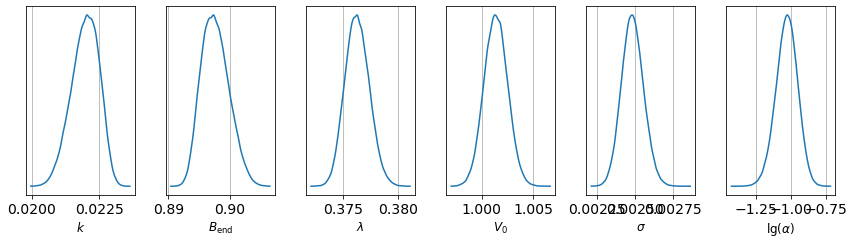

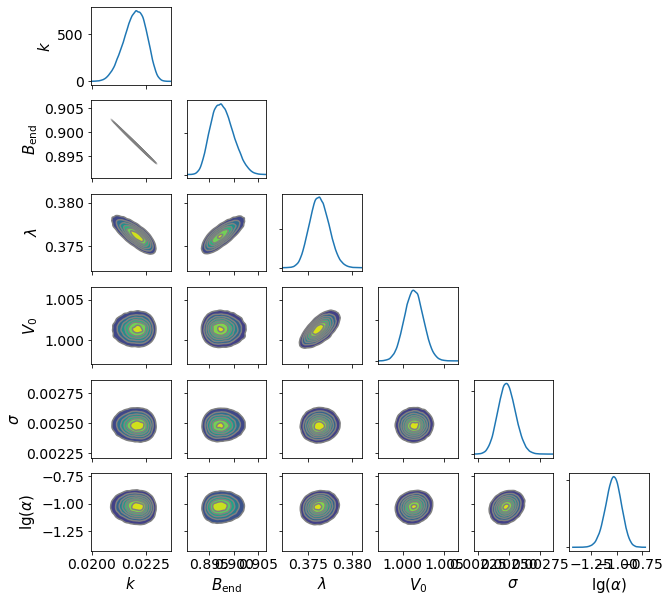

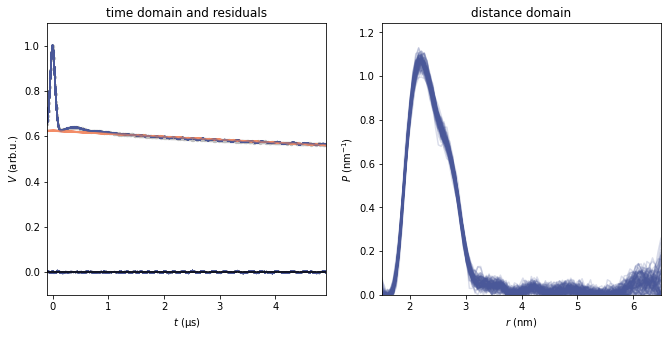

In [8]:
dive.summary(trace_s1_rmax65_dr005_4c_50s_20t,model_s1_rmax65_Bend_dr005)

# Sample 2 analysis

## rmax testing 

In [4]:
pars = {"method": 'regularization', "r": np.linspace(1.5,9.5,160),"bkgd_var":"Bend"}

model_s2_rmax95_Bend_dr005 = dive.model(t2, V2exp, pars)

MCMCparameters = {"draws": 50000,"tune": 20000, "chains": 4, 'cores': 4, 'init':'adapt_full'}
nuts={'target_accept':0.90}
trace_s2_rmax95_dr005_4c_50s_20t = dive.sample(model_s2_rmax95_Bend_dr005,MCMCparameters,NUTSpars=nuts)

Time range:          579 points (dt=0.00798618) from -0.104 µs to 4.52 µs
Distance range:      160 points (dr=0.05) from 1.5 nm to 9.5 nm
Model:              regularization


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>randTau_Bend_posterior: [tau]
>randDelta_posterior: [delta]
>randPnorm_Bend_posterior: [P]
>NUTS: [lamb, V0, Bend]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 20_000 tune and 50_000 draw iterations (80_000 + 200_000 draws total) took 6928 seconds.
The acceptance probability does not match the target. It is 0.9897445188915956, but should be close to 0.9. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9904259948605895, but should be close to 0.9. Try to increase the number of tu

In [5]:
pm.save_trace(trace_s2_rmax95_dr005_4c_50s_20t,'trace_s2_rmax95_dr005_4c_50s_20t_43406div.trace',overwrite=True)

'trace_s2_rmax95_dr005_4c_50s_20t_43406div.trace'

In [6]:
dive.printsummary(trace_s2_rmax95_dr005_4c_50s_20t,model_s2_rmax95_Bend_dr005)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.012,0.010,0.000,0.029,0.005,0.004,6.0,24.0,1.79
$B_\mathrm{end}$,0.948,0.043,0.877,0.999,0.020,0.015,6.0,24.0,1.79
$λ$,0.477,0.026,0.433,0.513,0.012,0.009,6.0,21.0,1.79
$V_0$,0.999,0.001,0.996,1.001,0.000,0.000,8.0,16.0,1.42
$σ$,0.003,0.000,0.003,0.003,0.000,0.000,642.0,1027.0,1.01
$\mathrm{lg}(α)$,-0.987,0.075,-1.130,-0.847,0.010,0.007,63.0,559.0,1.04


In [7]:
pars = {"method": 'regularization', "r": np.linspace(1.5,8.5,140),"bkgd_var":"Bend"}

model_s2_rmax85_Bend_dr005 = dive.model(t2, V2exp, pars)

MCMCparameters = {"draws": 50000,"tune": 20000, "chains": 4, 'cores': 4, 'init':'adapt_full'}
nuts={'target_accept':0.90}
trace_s2_rmax85_dr005_4c_50s_20t = dive.sample(model_s2_rmax85_Bend_dr005,MCMCparameters,NUTSpars=nuts)

Time range:          579 points (dt=0.00798618) from -0.104 µs to 4.52 µs
Distance range:      140 points (dr=0.05) from 1.5 nm to 8.5 nm
Model:              regularization


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>randTau_Bend_posterior: [tau]
>randDelta_posterior: [delta]
>randPnorm_Bend_posterior: [P]
>NUTS: [lamb, V0, Bend]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 20_000 tune and 50_000 draw iterations (80_000 + 200_000 draws total) took 5213 seconds.
There were 17776 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.26429580427666083, but should be close to 0.9. Try to increase the number of tuning steps.
There were 8550 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5219921453055753, but should be close to 0.9. Try to increase the number of tuning steps.
There were 7184 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6796032928837548, but should be close to 0.9. Try to increase th

In [8]:
pm.save_trace(trace_s2_rmax85_dr005_4c_50s_20t,'trace_s2_rmax85_dr005_4c_50s_20t_33510div.trace',overwrite=True)

'trace_s2_rmax85_dr005_4c_50s_20t_33510div.trace'

In [9]:
dive.printsummary(trace_s2_rmax85_dr005_4c_50s_20t, model_s2_rmax85_Bend_dr005)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.013,0.008,0.000,0.027,0.003,0.002,8.0,15.0,1.46
$B_\mathrm{end}$,0.945,0.034,0.885,0.999,0.013,0.009,8.0,15.0,1.46
$λ$,0.470,0.017,0.440,0.497,0.006,0.005,8.0,17.0,1.45
$V_0$,0.999,0.001,0.997,1.002,0.000,0.000,244.0,946.0,1.02
$σ$,0.003,0.000,0.003,0.003,0.000,0.000,116.0,192.0,1.02
$\mathrm{lg}(α)$,-1.009,0.076,-1.153,-0.868,0.005,0.004,223.0,4687.0,1.02


## *r*<sub>max</sub>=auto (7.93 nm)

In [12]:
pars = {"method": 'regularization', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"Bend"}

model_s2_rmaxauto_Bend_dr005 = dive.model(t2, V2exp, pars)

MCMCparameters = {"draws": 50000,"tune": 20000, "chains": 4, 'cores': 4, 'init':'adapt_full'}
nuts={'target_accept':0.90}
trace_s2_rmaxauto_dr005_4c_50s_20t = dive.sample(model_s2_rmaxauto_Bend_dr005,MCMCparameters,NUTSpars=nuts)

Time range:          579 points (dt=0.00798618) from -0.104 µs to 4.52 µs
Distance range:      128 points (dr=0.050264) from 1.5 nm to 7.93379 nm
Model:              regularization


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>randTau_Bend_posterior: [tau]
>randDelta_posterior: [delta]
>randPnorm_Bend_posterior: [P]
>NUTS: [lamb, V0, Bend]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 20_000 tune and 50_000 draw iterations (80_000 + 200_000 draws total) took 3795 seconds.
The acceptance probability does not match the target. It is 0.9783425751124507, but should be

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.021,0.004,0.013,0.028,0.001,0.000,62.0,241.0,1.07
$B_\mathrm{end}$,0.911,0.018,0.881,0.944,0.002,0.001,62.0,241.0,1.07
$λ$,0.451,0.008,0.438,0.467,0.001,0.001,62.0,249.0,1.07
$V_0$,1.000,0.001,0.997,1.002,0.000,0.000,7038.0,13067.0,1.00
$σ$,0.003,0.000,0.003,0.003,0.000,0.000,170118.0,190825.0,1.00
$\mathrm{lg}(α)$,-1.052,0.074,-1.191,-0.914,0.001,0.000,16972.0,40937.0,1.00


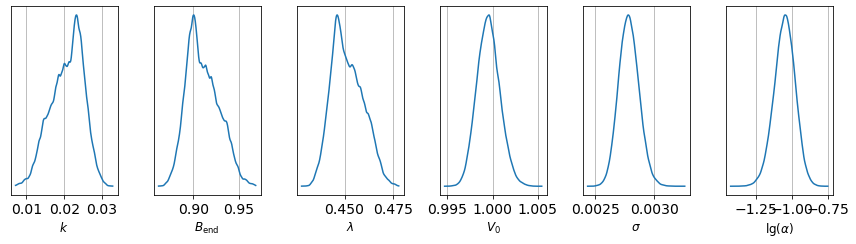

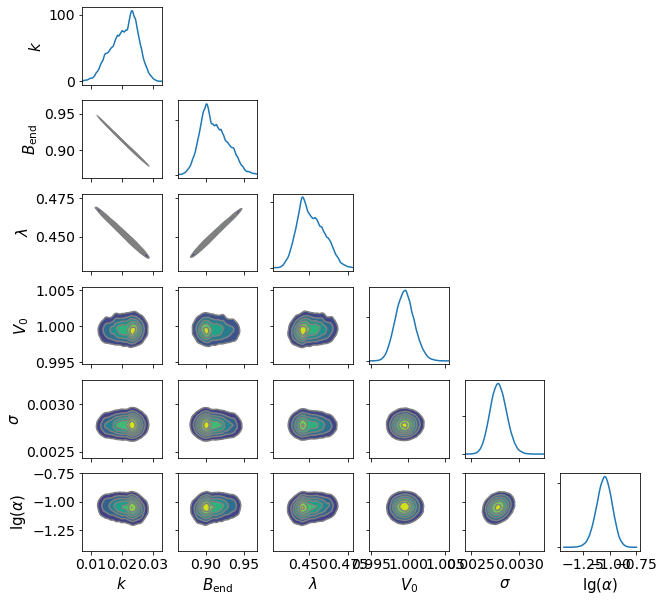

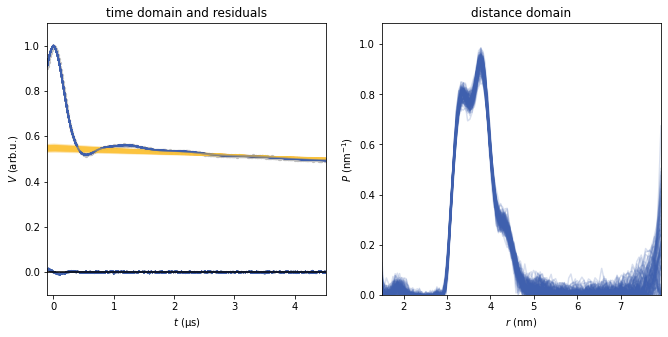

In [14]:
dive.summary(trace_s2_rmaxauto_dr005_4c_50s_20t,model_s2_rmaxauto_Bend_dr005)

In [13]:
pm.save_trace(trace_s2_rmaxauto_dr005_4c_50s_20t,'trace_s2_rmaxauto_dr005_4c_50s_20t_0div_rhat.trace',overwrite=True)

'trace_s2_rmaxauto_dr005_4c_50s_20t_0div_rhat.trace'

## *r*<sub>max</sub>= 7.5 nm

In [13]:
pars = {"method": 'regularization', "r": np.linspace(1.5,7.5,120),"rmax_opt":"user","bkgd_var":"Bend"}

model_s2_rmax75_Bend_dr005 = dive.model(t2, V2exp, pars)

MCMCparameters = {"draws": 50000,"tune": 20000, "chains": 4, 'cores': 4, 'init':'adapt_full'}
nuts={'target_accept':0.90}
trace_s2_rmax75_dr005_4c_50s_20t = dive.sample(model_s2_rmax75_Bend_dr005,MCMCparameters,NUTSpars=nuts)

Time range:          579 points (dt=0.00798618) from -0.104 µs to 4.52 µs
Distance range:      120 points (dr=0.05) from 1.5 nm to 7.5 nm
Model:              regularization


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>randTau_Bend_posterior: [tau]
>randDelta_posterior: [delta]
>randPnorm_Bend_posterior: [P]
>NUTS: [lamb, V0, Bend]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 20_000 tune and 50_000 draw iterations (80_000 + 200_000 draws total) took 1394 seconds.
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.027,0.002,0.022,0.031,0.000,0.0,317.0,643.0,1.01
$B_\mathrm{end}$,0.887,0.009,0.869,0.904,0.001,0.0,317.0,643.0,1.01
$λ$,0.440,0.004,0.432,0.448,0.000,0.0,320.0,649.0,1.01
$V_0$,1.000,0.001,0.997,1.002,0.000,0.0,8058.0,15458.0,1.00
$σ$,0.003,0.000,0.003,0.003,0.000,0.0,171831.0,192812.0,1.00
$\mathrm{lg}(α)$,-1.073,0.075,-1.217,-0.934,0.001,0.0,21209.0,45337.0,1.00


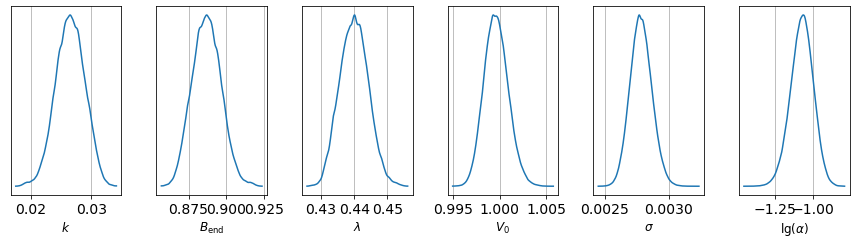

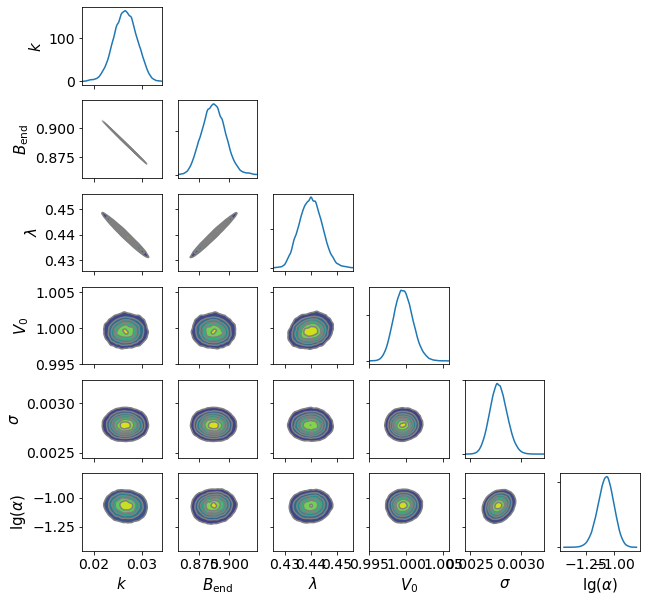

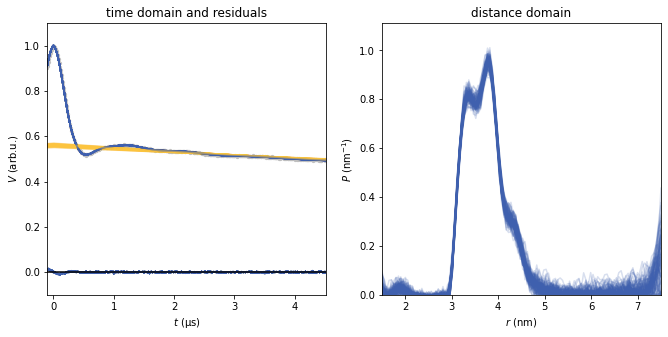

In [14]:
dive.summary(trace_s2_rmax75_dr005_4c_50s_20t,model_s2_rmax75_Bend_dr005)

In [15]:
pm.save_trace(trace_s2_rmax75_dr005_4c_50s_20t,'trace_s2_rmax75_dr005_4c_50s_20t_0div_rhatbendlambVO01.trace',overwrite=True)

'trace_s2_rmax75_dr005_4c_50s_20t_0div_rhatbendlambVO01.trace'

In [19]:
pars = {"method": 'regularization', "r": np.linspace(1.5,6.5,100),"bkgd_var":"Bend"}

model_s2_rmax65_Bend_dr005 = dive.model(t2, V2exp, pars)

MCMCparameters = {"draws": 50000,"tune": 20000, "chains": 4, 'cores': 4, 'init':'adapt_full'}
nuts={'target_accept':0.90}
trace_s2_rmax65_dr005_4c_50s_20t = dive.sample(model_s2_rmax65_Bend_dr005,MCMCparameters,NUTSpars=nuts)

Time range:          579 points (dt=0.00798618) from -0.104 µs to 4.52 µs
Distance range:      100 points (dr=0.05) from 1.5 nm to 6.5 nm
Model:              regularization


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>randTau_Bend_posterior: [tau]
>randDelta_posterior: [delta]
>randPnorm_Bend_posterior: [P]
>NUTS: [lamb, V0, Bend]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 20_000 tune and 50_000 draw iterations (80_000 + 200_000 draws total) took 1308 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [20]:
pm.save_trace(trace_s2_rmax65_dr005_4c_50s_20t,'trace_s2_rmax65_dr005_4c_50s_20t_0div_rhat1.trace',overwrite=True)

'trace_s2_rmax65_dr005_4c_50s_20t_0div_rhat1.trace'

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.033,0.001,0.032,0.034,0.000,0.0,3429.0,7372.0,1.0
$B_\mathrm{end}$,0.862,0.003,0.856,0.867,0.000,0.0,3429.0,7372.0,1.0
$λ$,0.428,0.001,0.426,0.431,0.000,0.0,3803.0,8660.0,1.0
$V_0$,1.000,0.001,0.997,1.002,0.000,0.0,9960.0,17231.0,1.0
$σ$,0.003,0.000,0.003,0.003,0.000,0.0,167193.0,187927.0,1.0
$\mathrm{lg}(α)$,-1.118,0.080,-1.269,-0.969,0.001,0.0,25191.0,47753.0,1.0


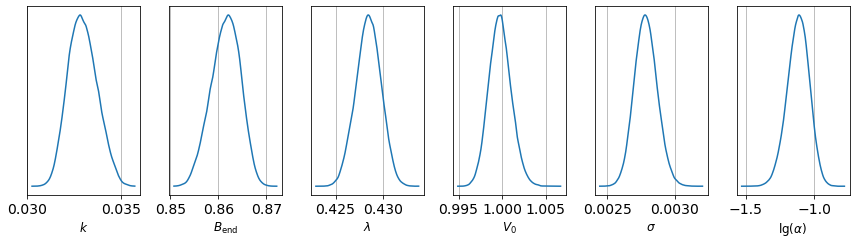

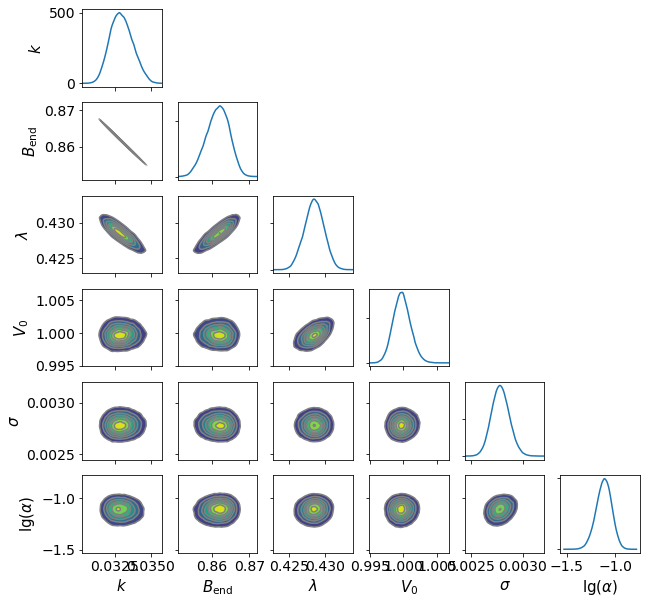

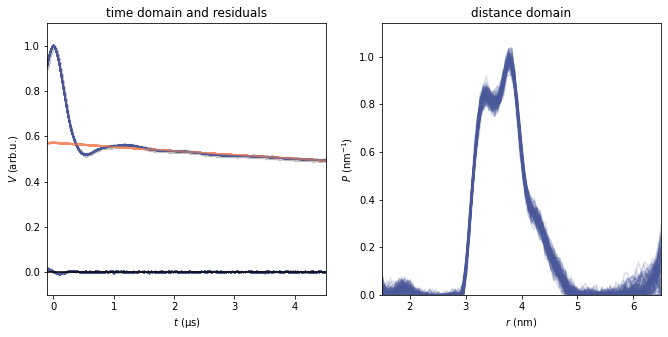

In [21]:
dive.summary(trace_s2_rmax65_dr005_4c_50s_20t,model_s2_rmax65_Bend_dr005)

### Plotting

In [3]:
pars = {"method": 'regularization', "r": np.linspace(1.5,9.5,160),"bkgd_var":"Bend"}

model_s2_rmax95_Bend_dr005 = dive.model(t2, V2exp, pars)

trace_s2_rmax95 = pm.load_trace('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/Figure5/trace_s2_rmax95_dr005_4c_50s_20t_43406div.trace',model=model_s2_rmax95_Bend_dr005["model"])

Time range:          579 points (dt=0.00798618) from -0.104 µs to 4.52 µs
Distance range:      160 points (dr=0.05) from 1.5 nm to 9.5 nm
Model:              regularization


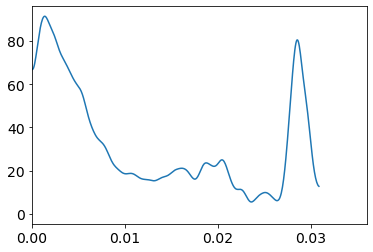

In [6]:
ax1 = az.plot_kde(trace_s2_rmax95["k"])
ax1.set_xlim([0.00, 0.036])
fig = plt.gcf() # to get the current figure...
fig.savefig("s2_rmax95_posteriors_k.svg") # and save it directly

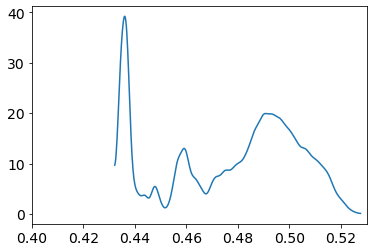

In [9]:
ax1 = az.plot_kde(trace_s2_rmax95["lamb"])
ax1.set_xlim([0.4, 0.53])
fig = plt.gcf() # to get the current figure...
fig.savefig("s2_rmax95_posteriors_lamb.svg") # and save it directly

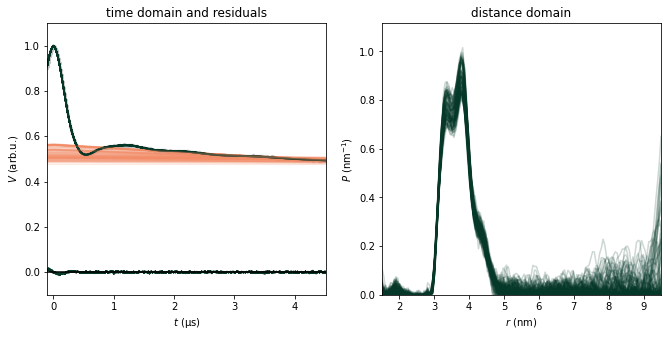

In [10]:
dive.plotresult(trace_s2_rmax95,model_s2_rmax95_Bend_dr005, colors=['#053828',"#F38D68"])
fig = plt.gcf() # to get the current figure...
fig.savefig("s2_rmax95_MCMC.svg") # and save it directly

In [4]:
pars = {"method": 'regularization', "r": np.linspace(1.5,8.5,140),"bkgd_var":"Bend"}

model_s2_rmax85_Bend_dr005 = dive.model(t2, V2exp, pars)

trace_s2_rmax85 = pm.load_trace('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/Figure5/trace_s2_rmax85_dr005_4c_50s_20t_33510div.trace',model=model_s2_rmax85_Bend_dr005["model"])

Time range:          579 points (dt=0.00798618) from -0.104 µs to 4.52 µs
Distance range:      140 points (dr=0.05) from 1.5 nm to 8.5 nm
Model:              regularization


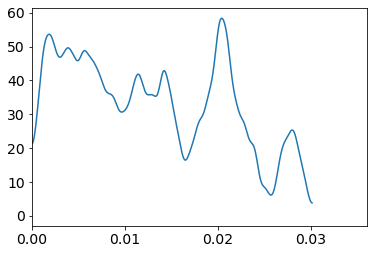

In [12]:
ax1 = az.plot_kde(trace_s2_rmax85["k"])
ax1.set_xlim([0.00, 0.036])
fig = plt.gcf() # to get the current figure...
fig.savefig("s2_rmax85_posteriors_k.svg") # and save it directly

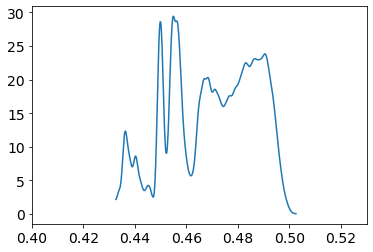

In [13]:
ax1 = az.plot_kde(trace_s2_rmax85["lamb"])
ax1.set_xlim([0.4, 0.53])
fig = plt.gcf() # to get the current figure...
fig.savefig("s2_rmax85_posteriors_lamb.svg") # and save it directly

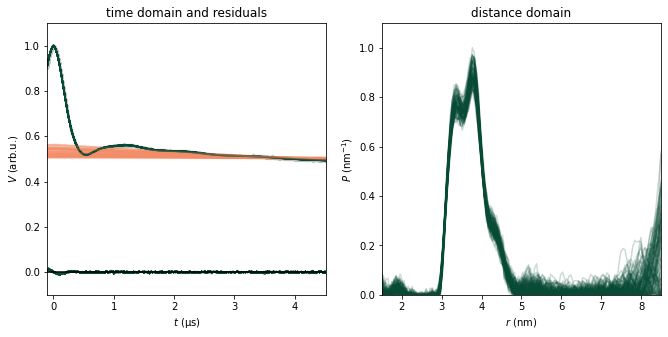

In [5]:
dive.plotresult(trace_s2_rmax85,model_s2_rmax85_Bend_dr005, colors=['#074A35',"#F38D68"])
fig = plt.gcf() # to get the current figure...
fig.savefig("s2_rmax85_MCMC.svg") # and save it directly

In [6]:
pars = {"method": 'regularization', "r": np.linspace(1.5,7.5,120),"bkgd_var":"Bend"}

model_s2_rmax75_Bend_dr005 = dive.model(t2, V2exp, pars)

trace_s2_rmax75 = pm.load_trace('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/Figure5/trace_s2_rmax75_dr005_4c_50s_20t_0div_rhatbendlambVO01.trace',model=model_s2_rmax75_Bend_dr005["model"])

Time range:          579 points (dt=0.00798618) from -0.104 µs to 4.52 µs
Distance range:      120 points (dr=0.05) from 1.5 nm to 7.5 nm
Model:              regularization


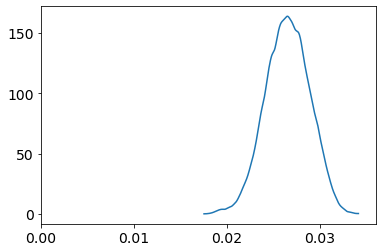

In [7]:
ax1 = az.plot_kde(trace_s2_rmax75["k"])
ax1.set_xlim([0.00, 0.036])
fig = plt.gcf() # to get the current figure...
fig.savefig("s2_rmax75_posteriors_k.svg") # and save it directly

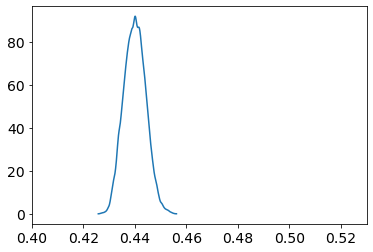

In [8]:
ax1 = az.plot_kde(trace_s2_rmax75["lamb"])
ax1.set_xlim([0.4, 0.53])
fig = plt.gcf() # to get the current figure...
fig.savefig("s2_rmax75_posteriors_lamb.svg") # and save it directly

In [9]:
pars = {"method": 'regularization', "r": np.linspace(1.5,6.5,100),"bkgd_var":"Bend"}

model_s2_rmax65_Bend_dr005 = dive.model(t2, V2exp, pars)

trace_s2_rmax65 = pm.load_trace('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/Figure5/trace_s2_rmax65_dr005_4c_50s_20t_0div_rhat1.trace',model=model_s2_rmax65_Bend_dr005["model"])


Time range:          579 points (dt=0.00798618) from -0.104 µs to 4.52 µs
Distance range:      100 points (dr=0.05) from 1.5 nm to 6.5 nm
Model:              regularization


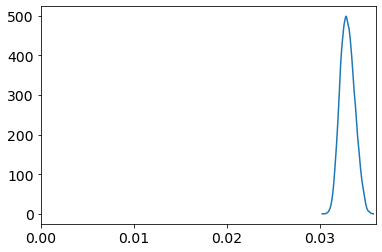

In [10]:
ax1 = az.plot_kde(trace_s2_rmax65["k"])
ax1.set_xlim([0.00, 0.036])
fig = plt.gcf() # to get the current figure...
fig.savefig("s2_rmax65_posteriors_k.svg") # and save it directly

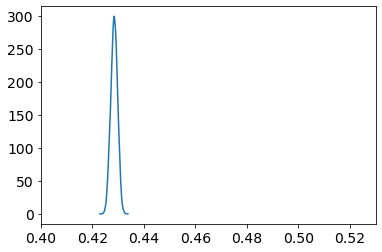

In [11]:
ax1 = az.plot_kde(trace_s2_rmax65["lamb"])
ax1.set_xlim([0.4, 0.53])
fig = plt.gcf() # to get the current figure...
fig.savefig("s2_rmax65_posteriors_lamb.svg") # and save it directly

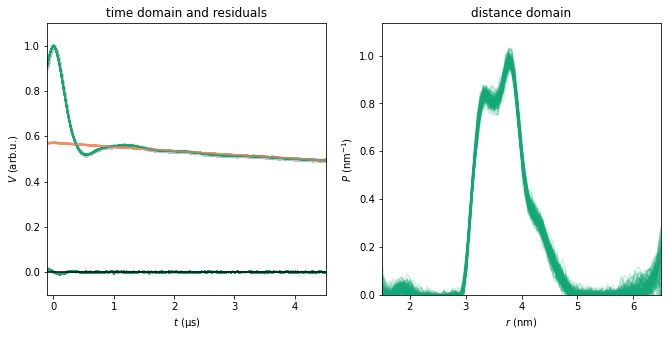

In [4]:
dive.plotresult(trace_s2_rmax65,model_s2_rmax65_Bend_dr005, colors=['#11A777',"#F38D68"])
fig = plt.gcf() # to get the current figure...
fig.savefig("s2_rmax65_MCMC.svg") # and save it directly

# Sample 3 analysis

## *r*<sub>max</sub>=auto (9.76 nm)

In [6]:
pars = {"method": 'regularization', "r": np.linspace(1.5,8,130),"rmax_auto":True,"bkgd_var":"Bend"}

model_s3_rmaxauto_Bend_dr005 = dive.model(t3, V3exp, pars)

MCMCparameters = {"draws": 50000,"tune": 20000, "chains": 4, 'cores': 4, 'init':'adapt_full'}
nuts={'target_accept':0.90}
trace_s3_rmaxauto_dr005_4c_50s_20t = dive.sample(model_s3_rmaxauto_Bend_dr005,MCMCparameters,NUTSpars=nuts)

Time range:          539 points (dt=0.0159703) from -0.096 µs to 8.512 µs
Distance range:      165 points (dr=0.0500595) from 1.5 nm to 9.75982 nm
Model:              regularization


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>randTau_Bend_posterior: [tau]
>randDelta_posterior: [delta]
>randPnorm_Bend_posterior: [P]
>NUTS: [lamb, V0, Bend]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 20_000 tune and 50_000 draw iterations (80_000 + 200_000 draws total) took 7331 seconds.
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.022,0.003,0.017,0.027,0.000,0.000,309.0,507.0,1.01
$B_\mathrm{end}$,0.828,0.019,0.795,0.865,0.001,0.001,309.0,507.0,1.01
$λ$,0.426,0.010,0.409,0.444,0.001,0.000,316.0,506.0,1.01
$V_0$,0.998,0.003,0.993,1.004,0.000,0.000,6656.0,10556.0,1.00
$σ$,0.005,0.000,0.005,0.006,0.000,0.000,154564.0,191260.0,1.00
$\mathrm{lg}(α)$,-0.301,0.089,-0.469,-0.136,0.001,0.001,8761.0,16088.0,1.00


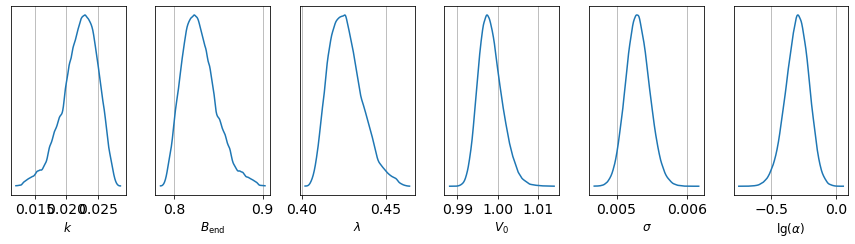

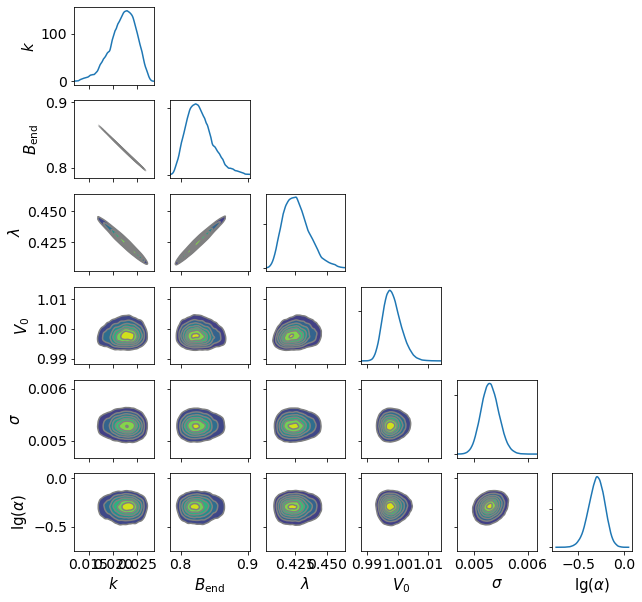

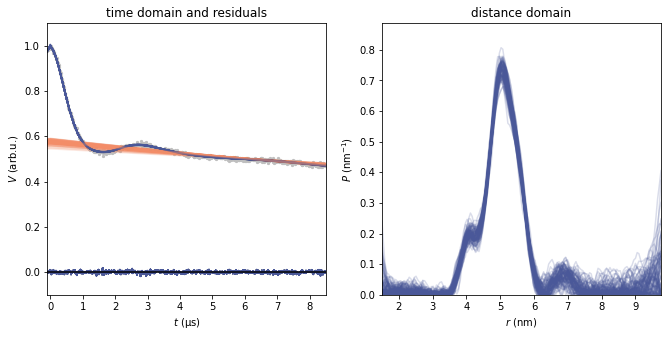

In [8]:
dive.summary(trace_s3_rmaxauto_dr005_4c_50s_20t,model_s3_rmaxauto_Bend_dr005)

In [7]:
pm.save_trace(trace_s3_rmaxauto_dr005_4c_50s_20t,'trace_s3_rmaxauto_dr005_4c_50s_20t_0div_rhat1.trace',overwrite=True)

'trace_s3_rmaxauto_dr005_4c_50s_20t_0div_rhat1.trace'

## *r*<sub>max</sub>= 9.00 nm

In [9]:
pars = {"method": 'regularization', "r": np.linspace(1.5,9.0,150),"rmax_opt":"user","bkgd_var":"Bend"}

model_s3_rmax9_Bend_dr005 = dive.model(t3, V3exp, pars)

MCMCparameters = {"draws": 50000,"tune": 20000, "chains": 4, 'cores': 4, 'init':'adapt_full'}
nuts={'target_accept':0.90}
trace_s3_rmax9_dr005_4c_50s_20t = dive.sample(model_s3_rmax9_Bend_dr005,MCMCparameters,NUTSpars=nuts)

Time range:          539 points (dt=0.0159703) from -0.096 µs to 8.512 µs
Distance range:      150 points (dr=0.05) from 1.5 nm to 9 nm
Model:              regularization


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>randTau_Bend_posterior: [tau]
>randDelta_posterior: [delta]
>randPnorm_Bend_posterior: [P]
>NUTS: [lamb, V0, Bend]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 20_000 tune and 50_000 draw iterations (80_000 + 200_000 draws total) took 7821 seconds.
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.025,0.002,0.021,0.028,0.000,0.000,687.0,1478.0,1.01
$B_\mathrm{end}$,0.811,0.012,0.790,0.833,0.000,0.000,687.0,1478.0,1.01
$λ$,0.417,0.006,0.407,0.427,0.000,0.000,715.0,1561.0,1.01
$V_0$,0.998,0.003,0.993,1.004,0.000,0.000,6693.0,11049.0,1.00
$σ$,0.005,0.000,0.005,0.006,0.000,0.000,159908.0,188015.0,1.00
$\mathrm{lg}(α)$,-0.318,0.090,-0.488,-0.151,0.001,0.001,9517.0,17822.0,1.00


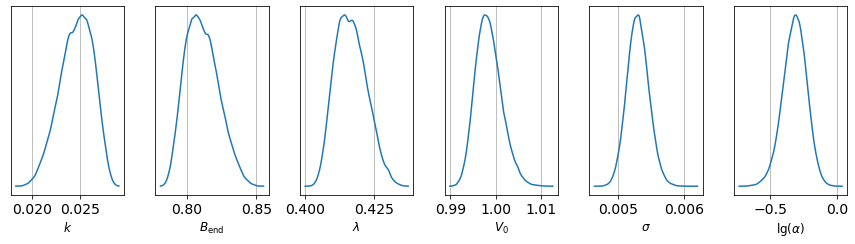

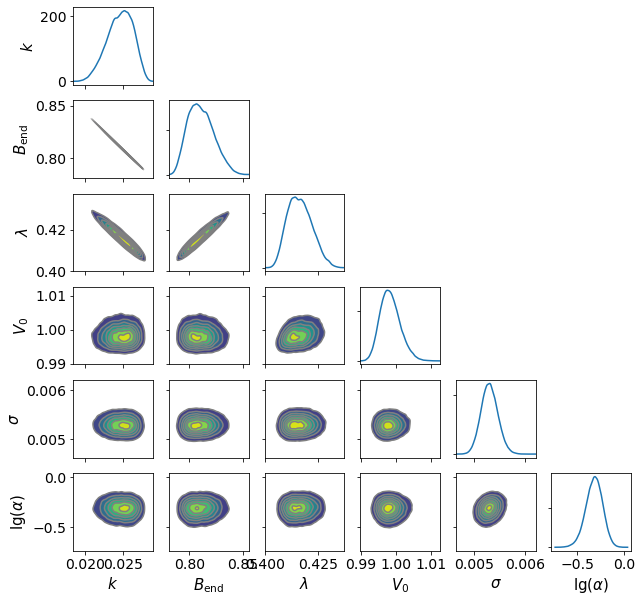

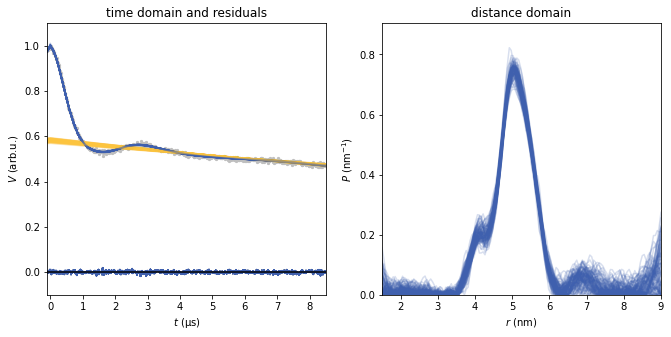

In [11]:
dive.summary(trace_s3_rmax9_dr005_4c_50s_20t,model_s3_rmax9_Bend_dr005)

In [10]:
pm.save_trace(trace_s3_rmax9_dr005_4c_50s_20t,'trace_s3_rmax9_dr005_4c_50s_20t_0div_rhat1.trace',overwrite=True)

'trace_s3_rmax9_dr005_4c_50s_20t_0div_rhat1.trace'

In [6]:
pars = {"method": 'regularization', "r": np.linspace(1.5,9.0,150),"rmax_opt":"user","bkgd_var":"Bend"}

model_s3_rmax9_Bend_dr005 = dive.model(t3, V3exp, pars)

trace_s3_rmax9 = pm.load_trace('/Users/sarahsweger/Documents/GitHub/dive-scripts/manuscript/SRS_analysis/trace_s3_rmax9_dr005_4c_50s_20t_0div_rhat1.trace',model=model_s3_rmax9_Bend_dr005["model"])

Time range:          539 points (dt=0.0159703) from -0.096 µs to 8.512 µs
Distance range:      150 points (dr=0.05) from 1.5 nm to 9 nm
Model:              regularization


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.025,0.002,0.021,0.028,0.000,0.000,687.0,1478.0,1.01
$B_\mathrm{end}$,0.811,0.012,0.790,0.833,0.000,0.000,687.0,1478.0,1.01
$λ$,0.417,0.006,0.407,0.427,0.000,0.000,715.0,1561.0,1.01
$V_0$,0.998,0.003,0.993,1.004,0.000,0.000,6693.0,11049.0,1.00
$σ$,0.005,0.000,0.005,0.006,0.000,0.000,159908.0,188015.0,1.00
$\mathrm{lg}(α)$,-0.318,0.090,-0.488,-0.151,0.001,0.001,9517.0,17822.0,1.00


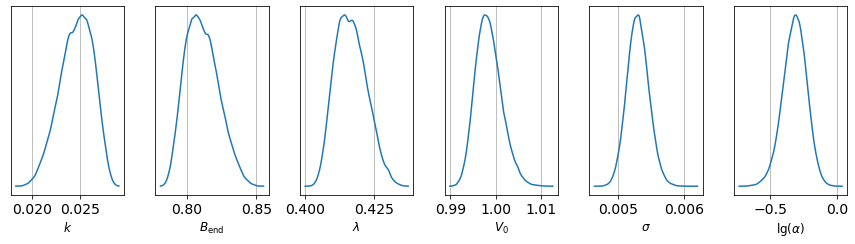

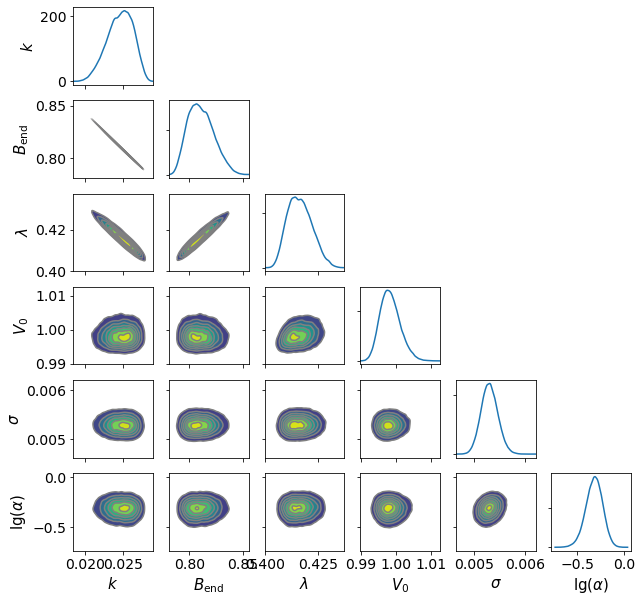

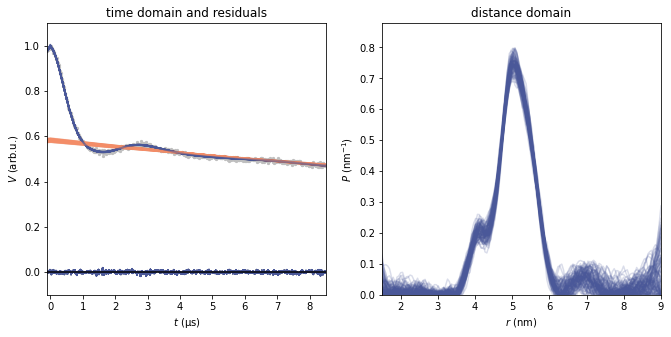

In [7]:
dive.summary(trace_s3_rmax9,model_s3_rmax9_Bend_dr005)

In [7]:
pars = {"method": 'regularization', "r": np.linspace(1.5,8.0,130),"rmax_opt":"user","bkgd_var":"Bend"}

model_s3_rmax85_Bend_dr005 = dive.model(t3, V3exp, pars)

MCMCparameters = {"draws": 50000,"tune": 20000, "chains": 4, 'cores': 4, 'init':'adapt_full'}
nuts={'target_accept':0.90}
trace_s3_rmax85_dr005_4c_50s_20t = dive.sample(model_s3_rmax85_Bend_dr005,MCMCparameters,NUTSpars=nuts)

Time range:          539 points (dt=0.0159703) from -0.096 µs to 8.512 µs
Distance range:      130 points (dr=0.05) from 1.5 nm to 8 nm
Model:              regularization


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>randTau_Bend_posterior: [tau]
>randDelta_posterior: [delta]
>randPnorm_Bend_posterior: [P]
>NUTS: [lamb, V0, Bend]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 20_000 tune and 50_000 draw iterations (80_000 + 200_000 draws total) took 6074 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [8]:
pm.save_trace(trace_s3_rmax85_dr005_4c_50s_20t,'trace_s3_rmax85_dr005_4c_50s_20t_0div_rhat1.trace',overwrite=True)

'trace_s3_rmax85_dr005_4c_50s_20t_0div_rhat1.trace'

Time range:          539 points (dt=0.0159703) from -0.096 µs to 8.512 µs
Distance range:      130 points (dr=0.05) from 1.5 nm to 8 nm
Model:              regularization


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.027,0.001,0.026,0.029,0.000,0.000,3728.0,6292.0,1.0
$B_\mathrm{end}$,0.792,0.005,0.783,0.802,0.000,0.000,3728.0,6292.0,1.0
$λ$,0.408,0.003,0.403,0.413,0.000,0.000,3850.0,6948.0,1.0
$V_0$,0.999,0.003,0.994,1.004,0.000,0.000,7003.0,12551.0,1.0
$σ$,0.005,0.000,0.005,0.006,0.000,0.000,164797.0,191882.0,1.0
$\mathrm{lg}(α)$,-0.351,0.092,-0.525,-0.181,0.001,0.001,10469.0,17883.0,1.0


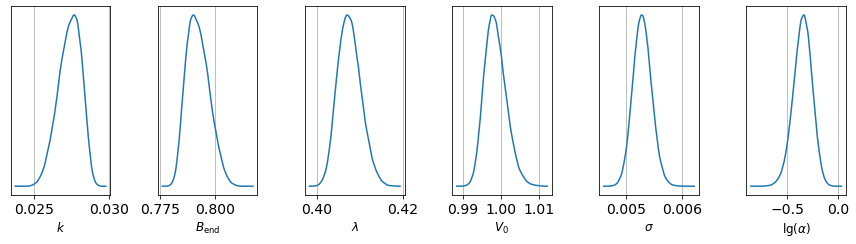

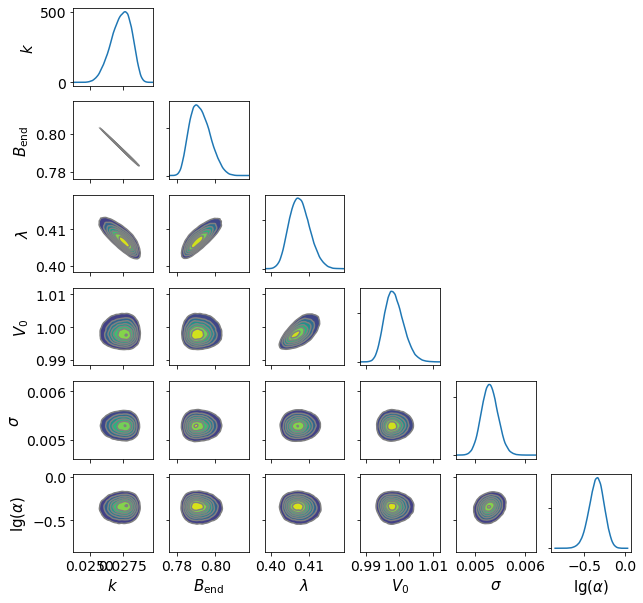

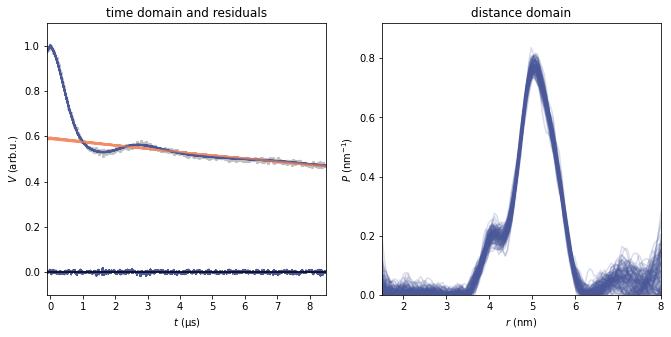

In [3]:
pars = {"method": 'regularization', "r": np.linspace(1.5,8.0,130),"rmax_opt":"user","bkgd_var":"Bend"}

model_s3_rmax8_Bend_dr005 = dive.model(t3, V3exp, pars)

trace_s3_rmax8 = pm.load_trace('/Users/sarahsweger/Documents/GitHub/dive-scripts/manuscript/SRS_analysis/trace_s3_rmax85_dr005_4c_50s_20t_0div_rhat1.trace',model=model_s3_rmax8_Bend_dr005["model"])

dive.summary(trace_s3_rmax8,model_s3_rmax8_Bend_dr005)

# Sample 4 analysis

## *r*<sub>max</sub>=auto (8.94 nm)

In [9]:
pars = {"method": 'regularization', "r": np.linspace(1.5,8,130),"rmax_auto":True,"bkgd_var":"Bend"}

model_s4_rmaxauto_Bend_dr005 = dive.model(t4, V4exp, pars)

MCMCparameters = {"draws": 50000,"tune": 20000, "chains": 4, 'cores': 4, 'init':'adapt_full'}
nuts={'target_accept':0.90}
trace_s4_rmaxauto_dr005_4c_50s_20t = dive.sample(model_s4_rmaxauto_Bend_dr005,MCMCparameters,NUTSpars=nuts)

Time range:          829 points (dt=0.00799035) from -0.104 µs to 6.52 µs
Distance range:      148 points (dr=0.0502949) from 1.5 nm to 8.94365 nm
Model:              regularization


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>randTau_Bend_posterior: [tau]
>randDelta_posterior: [delta]
>randPnorm_Bend_posterior: [P]
>NUTS: [lamb, V0, Bend]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 20_000 tune and 50_000 draw iterations (80_000 + 200_000 draws total) took 6347 seconds.
There were 1255 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4270 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6986465419366531, but should be close to 0.9. Try to incre

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.008,0.003,0.004,0.013,0.001,0.001,14.0,87.0,1.24
$B_\mathrm{end}$,0.952,0.017,0.917,0.974,0.005,0.003,14.0,87.0,1.24
$λ$,0.437,0.007,0.422,0.448,0.002,0.001,15.0,95.0,1.24
$V_0$,0.996,0.001,0.993,0.999,0.000,0.000,799.0,328.0,1.05
$σ$,0.003,0.000,0.002,0.003,0.000,0.000,78.0,132.0,1.03
$\mathrm{lg}(α)$,0.440,0.112,0.233,0.639,0.003,0.002,2074.0,2673.0,1.00


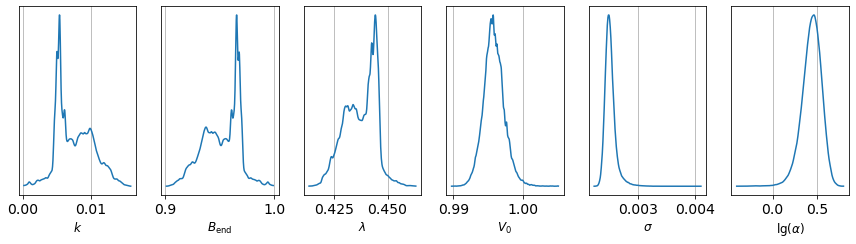

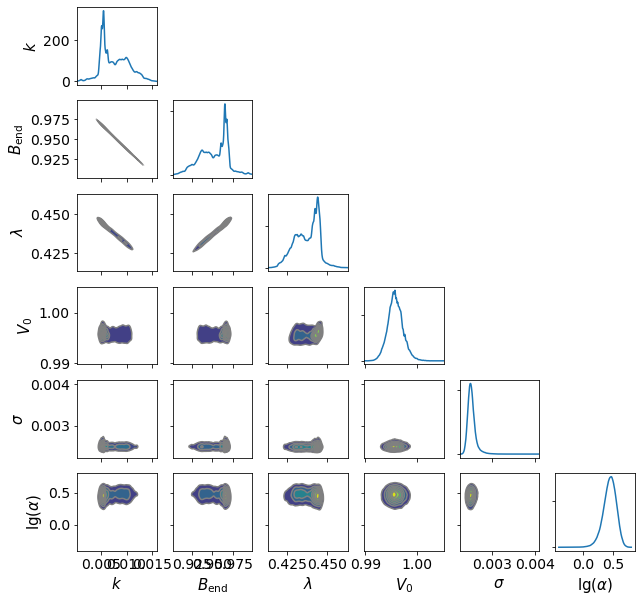

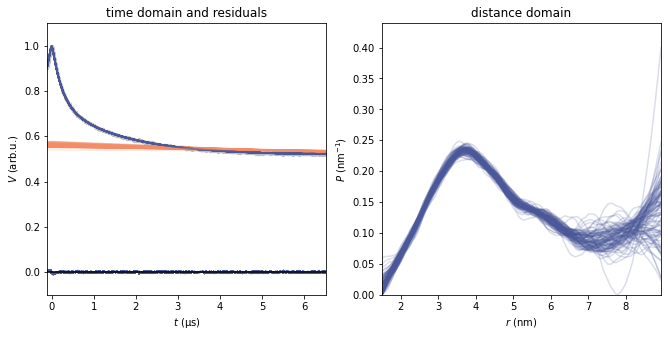

: 

In [11]:
dive.summary(trace_s4_rmaxauto_dr005_4c_50s_20t,model_s4_rmaxauto_Bend_dr005)

In [10]:
pm.save_trace(trace_s4_rmaxauto_dr005_4c_50s_20t,'trace_s4_rmaxauto_dr005_4c_50s_20t_35329div.trace',overwrite=True)

'trace_s4_rmaxauto_dr005_4c_50s_20t_35329div.trace'

## *r*<sub>max</sub>= 8.50 nm

In [6]:
pars = {"method": 'regularization', "r": np.linspace(1.5,8.5,140),"rmax_opt":"user","bkgd_var":"Bend"}

model_s4_rmax85_Bend_dr005 = dive.model(t4, V4exp, pars)

MCMCparameters = {"draws": 50000,"tune": 20000, "chains": 4, 'cores': 4, 'init':'adapt_full'}
nuts={'target_accept':0.90}
trace_s4_rmax85_dr005_4c_50s_20t = dive.sample(model_s4_rmax85_Bend_dr005,MCMCparameters,NUTSpars=nuts)

Time range:          829 points (dt=0.00799035) from -0.104 µs to 6.52 µs
Distance range:      140 points (dr=0.05) from 1.5 nm to 8.5 nm
Model:              regularization


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>randTau_Bend_posterior: [tau]
>randDelta_posterior: [delta]
>randPnorm_Bend_posterior: [P]
>NUTS: [lamb, V0, Bend]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 20_000 tune and 50_000 draw iterations (80_000 + 200_000 draws total) took 7874 seconds.
The acceptance probability does not match the target. It is 0.9663157581433421, but should be

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.013,0.002,0.009,0.016,0.000,0.000,141.0,93.0,1.03
$B_\mathrm{end}$,0.921,0.011,0.900,0.941,0.001,0.001,141.0,93.0,1.03
$λ$,0.422,0.005,0.413,0.431,0.000,0.000,144.0,94.0,1.02
$V_0$,0.996,0.001,0.993,0.998,0.000,0.000,4426.0,10068.0,1.00
$σ$,0.002,0.000,0.002,0.003,0.000,0.000,186241.0,192721.0,1.00
$\mathrm{lg}(α)$,0.416,0.106,0.216,0.612,0.002,0.002,2312.0,4228.0,1.00


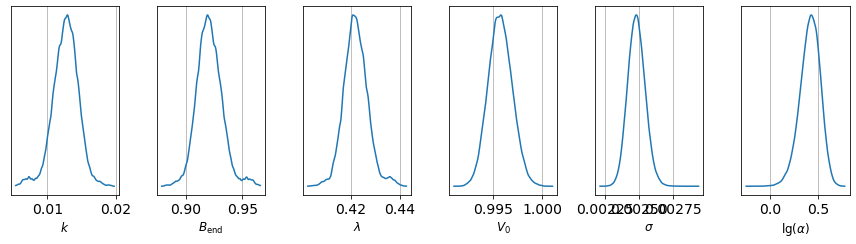

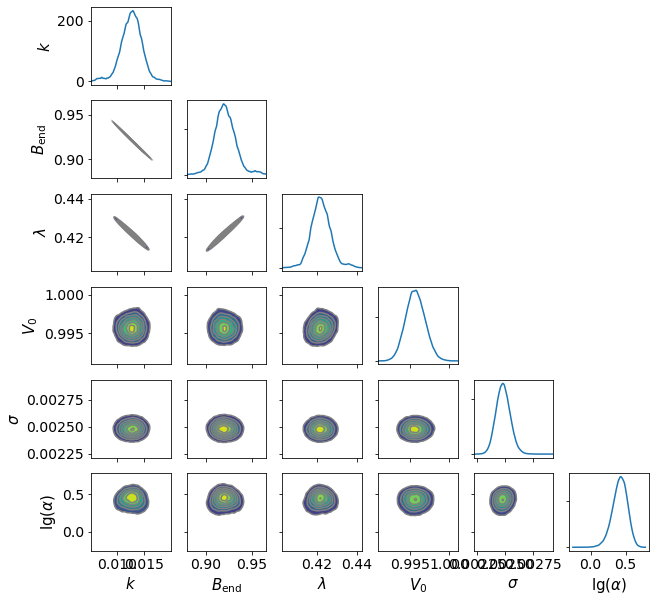

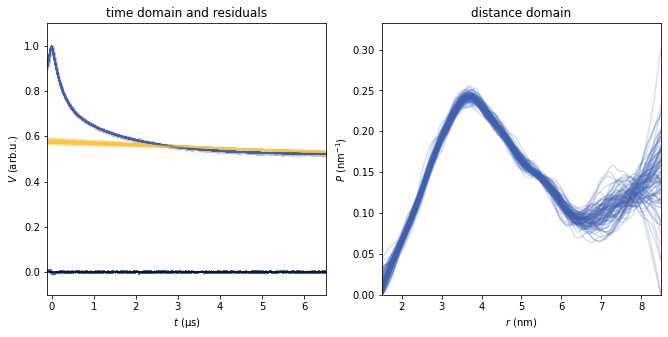

In [7]:
dive.summary(trace_s4_rmax85_dr005_4c_50s_20t,model_s4_rmax85_Bend_dr005)

In [8]:
pm.save_trace(trace_s4_rmax85_dr005_4c_50s_20t,'trace_s4_rmax85_dr005_4c_50s_20_0div_rhatbendlamb0302.trace',overwrite=True)

'trace_s4_rmax85_dr005_4c_50s_20_0div_rhatbendlamb0302.trace'

Time range:          829 points (dt=0.00799035) from -0.104 µs to 6.52 µs
Distance range:      140 points (dr=0.05) from 1.5 nm to 8.5 nm
Model:              regularization


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.013,0.002,0.009,0.016,0.000,0.000,141.0,93.0,1.03
$B_\mathrm{end}$,0.921,0.011,0.900,0.941,0.001,0.001,141.0,93.0,1.03
$λ$,0.422,0.005,0.413,0.431,0.000,0.000,144.0,94.0,1.02
$V_0$,0.996,0.001,0.993,0.998,0.000,0.000,4426.0,10068.0,1.00
$σ$,0.002,0.000,0.002,0.003,0.000,0.000,186241.0,192721.0,1.00
$\mathrm{lg}(α)$,0.416,0.106,0.216,0.612,0.002,0.002,2312.0,4228.0,1.00


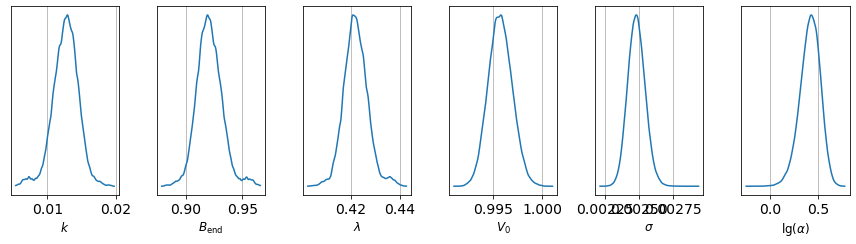

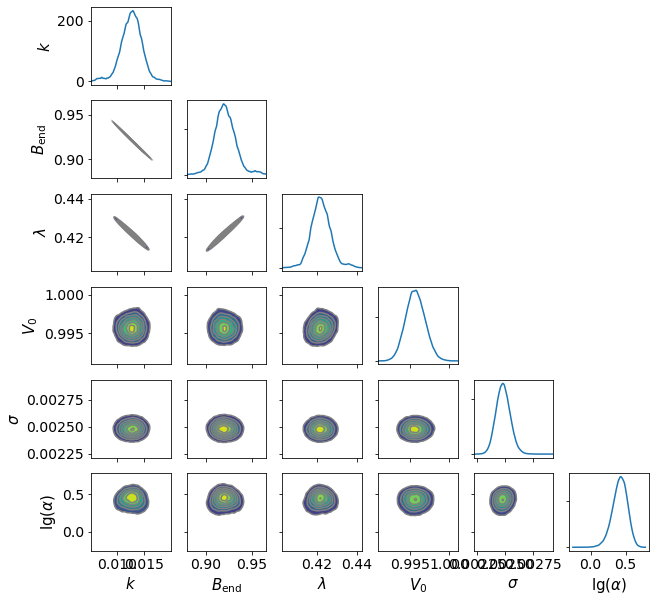

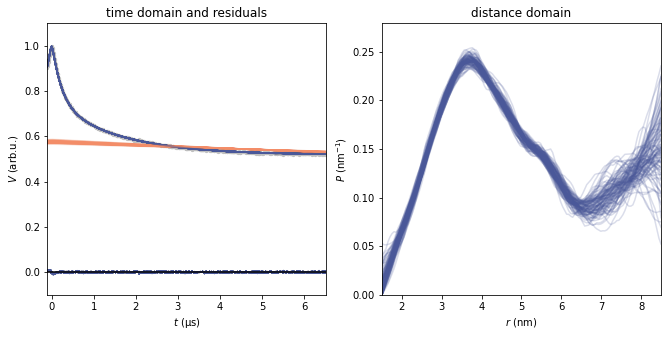

In [12]:
pars = {"method": 'regularization', "r": np.linspace(1.5,8.5,140),"rmax_opt":"user","bkgd_var":"Bend"}

model_s4_rmax85_Bend_dr005 = dive.model(t4, V4exp, pars)

trace_s4_rmax85 = pm.load_trace('/Users/sarahsweger/Documents/GitHub/dive-scripts/manuscript/SRS_analysis/trace_s4_rmax85_dr005_4c_50s_20_0div_rhatbendlamb0302.trace',model=model_s4_rmax85_Bend_dr005["model"])
dive.summary(trace_s4_rmax85,model_s4_rmax85_Bend_dr005)


# Plotting

## Sample 1

Time range:          627 points (dt=0.00798724) from -0.0968 µs to 4.9112 µs
Distance range:      132 points (dr=0.0503606) from 1.5 nm to 8.14759 nm
Model:              regularization


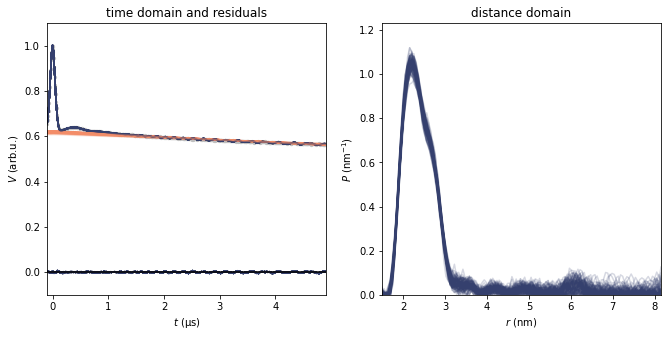

In [32]:
pars = {"method": 'regularization', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"Bend"}

model_s1_rmaxauto_Bend_dr005 = dive.model(t1, V1exp, pars)

trace_s1_rmaxauto = pm.load_trace('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/Figure4/trace_s1_rmaxauto_dr005_4c_50s_20t_29132div_rhatkBend19_rhatlamb17.trace',model=model_s1_rmaxauto_Bend_dr005["model"])

dive.plotresult(trace_s1_rmaxauto, model_s1_rmaxauto_Bend_dr005, colors=["#35406E","#F38D68"])
fig = plt.gcf()
fig.savefig("s1_npbayes_rmaxauto.svg")

In [6]:
pars = {"method": 'regularization', "r": np.linspace(1.5,7.5,120),"bkgd_var":"Bend"}

model_s1_rmax75_Bend_dr005 = dive.model(t1, V1exp, pars)

trace_s1_rmax75 = pm.load_trace('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/Figure4/trace_s1_rmax75_dr005_4c_50s_20t_0div_rhat1.trace/',model=model_s1_rmax75_Bend_dr005["model"])

#dive.plotresult(trace_s1_rmax75, model_s1_rmax75_Bend_dr005,colors=["#5C75D6","#F38D68"])
#fig = plt.gcf()
#fig.savefig("s1_npbayes_rmax75.svg")

Time range:          627 points (dt=0.00798724) from -0.0968 µs to 4.9112 µs
Distance range:      120 points (dr=0.05) from 1.5 nm to 7.5 nm
Model:              regularization


Time range:          627 points (dt=0.00798724) from -0.0968 µs to 4.9112 µs
Distance range:      100 points (dr=0.05) from 1.5 nm to 6.5 nm
Model:              regularization


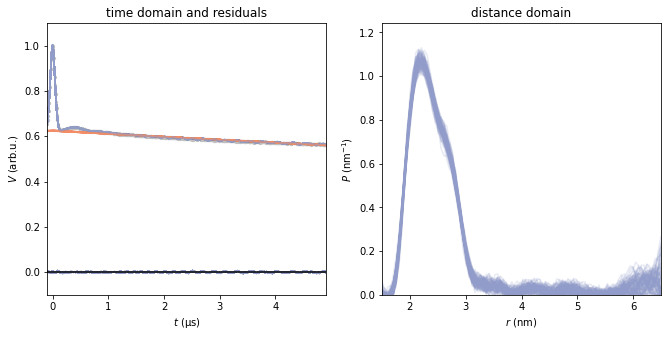

In [6]:
pars = {"method": 'regularization', "r": np.linspace(1.5,6.5,100),"bkgd_var":"Bend"}

model_s1_rmax65_Bend_dr005 = dive.model(t1, V1exp, pars)

trace_s1_rmax65 = pm.load_trace('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/Figure5/trace_s1_rmax65_dr005_4c_50s_20t_0div_rhat1.trace',model=model_s1_rmax65_Bend_dr005["model"])

dive.plotresult(trace_s1_rmax65, model_s1_rmax65_Bend_dr005, colors=["#919CCA","#F38D68"])
fig = plt.gcf()
fig.savefig("s1_npbayes_rmax65.svg")

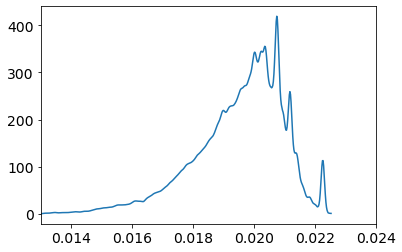

In [24]:
ax1 = az.plot_kde(trace_s1_rmaxauto["k"])
ax1.set_xlim([0.013, 0.024])
fig = plt.gcf() # to get the current figure...
fig.savefig("s1_rmaxauto_posteriors_k.svg") # and save it directly

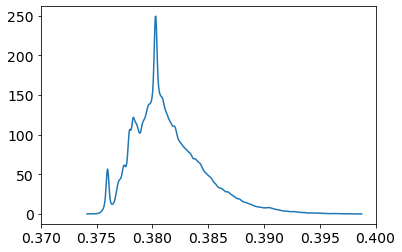

In [28]:
ax1 = az.plot_kde(trace_s1_rmaxauto["lamb"])
ax1.set_xlim([0.37, 0.4])
fig = plt.gcf() # to get the current figure...
fig.savefig("s1_rmaxauto_posteriors_lamb.svg") # and save it directly

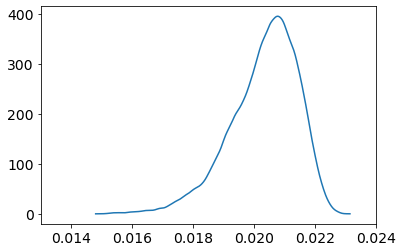

In [25]:
ax1 = az.plot_kde(trace_s1_rmax75["k"])
ax1.set_xlim([0.013, 0.024])
fig = plt.gcf() # to get the current figure...
fig.savefig("s1_rmax75_posteriors_k.svg") # and save it directly

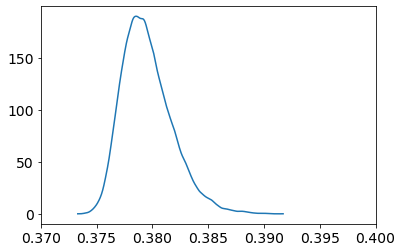

In [29]:
ax1 = az.plot_kde(trace_s1_rmax75["lamb"])
ax1.set_xlim([0.37, 0.4])
fig = plt.gcf() # to get the current figure...
fig.savefig("s1_rmax75_posteriors_lamb.svg") # and save it directly

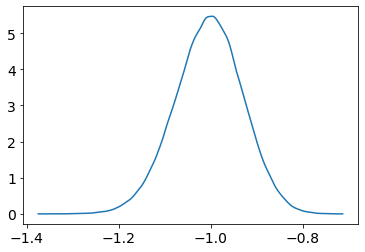

In [7]:
ax1 = az.plot_kde(trace_s1_rmax75["lg_alpha"])
#ax1.set_xlim([0.013, 0.024])
fig = plt.gcf() # to get the current figure...
fig.savefig("s1_rmax75_posteriors_lgalpha.svg") # and save it directly

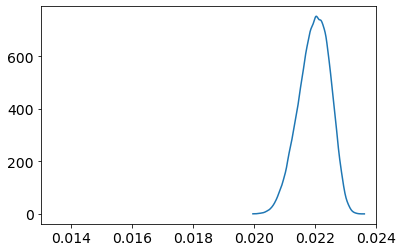

In [26]:
ax1 = az.plot_kde(trace_s1_rmax65["k"])
ax1.set_xlim([0.013, 0.024])
fig = plt.gcf() # to get the current figure...
fig.savefig("s1_rmax65_posteriors_k.svg") # and save it directly

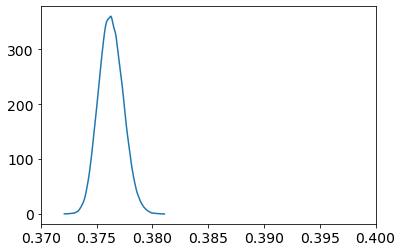

In [30]:
ax1 = az.plot_kde(trace_s1_rmax65["lamb"])
ax1.set_xlim([0.37, 0.4])
fig = plt.gcf() # to get the current figure...
fig.savefig("s1_rmax65_posteriors_lamb.svg") # and save it directly

## Sample 2

In [3]:
pars = {"method": 'regularization', "r": np.linspace(1.5,7.5,120),"bkgd_var":"Bend"}

model_s2_rmax75_Bend_dr005 = dive.model(t2, V2exp, pars)

trace_s2_rmax75 = pm.load_trace('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/Figure4/trace_s2_rmax75_dr005_4c_50s_20t_0div_rhatbendlambVO01.trace',model=model_s2_rmax75_Bend_dr005["model"])

#"#0B6E4F","#F38D68"])
#fig = plt.gcf()
#fig.savefig("s2_npbayes_rmax75.svg")

Time range:          579 points (dt=0.00798618) from -0.104 µs to 4.52 µs
Distance range:      120 points (dr=0.05) from 1.5 nm to 7.5 nm
Model:              regularization


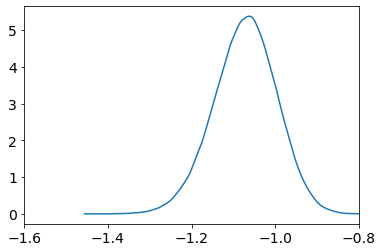

In [4]:
ax1 = az.plot_kde(trace_s2_rmax75["lg_alpha"])
ax1.set_xlim([-1.6, -0.8])
fig = plt.gcf() # to get the current figure...
fig.savefig("s2_rmax75_posteriors_lgalpha_2.svg") # and save it directly

## Sample 3

Time range:          539 points (dt=0.0159703) from -0.096 µs to 8.512 µs
Distance range:      165 points (dr=0.0500595) from 1.5 nm to 9.75982 nm
Model:              regularization


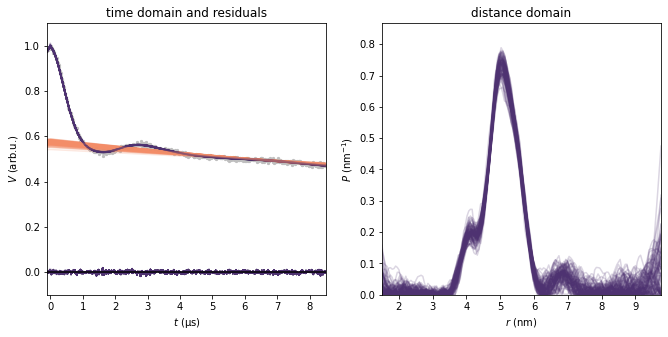

In [3]:
pars = {"method": 'regularization', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"Bend"}

model_s3_rmaxauto_Bend_dr005 = dive.model(t3, V3exp, pars)

trace_s3_rmaxauto = pm.load_trace('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/Figure5/trace_s3_rmaxauto_dr005_4c_50s_20t_0div_rhat1.trace',model=model_s3_rmaxauto_Bend_dr005["model"])

dive.plotresult(trace_s3_rmaxauto, model_s3_rmaxauto_Bend_dr005, colors=["#4E3271","#F38D68"])
fig = plt.gcf()
fig.savefig("s3_npbayes_rmaxauto.svg")

In [12]:
pars = {"method": 'regularization', "r": np.linspace(1.5,9.0,150),"bkgd_var":"Bend"}

model_s3_rmax9_Bend_dr005 = dive.model(t3, V3exp, pars)

trace_s3_rmax9 = pm.load_trace('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/Figure4/trace_s3_rmax9_dr005_4c_50s_20t_0div_rhat1.trace',model=model_s3_rmax9_Bend_dr005["model"])

#dive.plotresult(trace_s3_rmax9, model_s3_rmax9_Bend_dr005, colors=["#7754A0","#F38D68"])
#fig = plt.gcf()
#fig.savefig("s3_npbayes_rmax9.svg")

Time range:          539 points (dt=0.0159703) from -0.096 µs to 8.512 µs
Distance range:      150 points (dr=0.05) from 1.5 nm to 9 nm
Model:              regularization


Time range:          539 points (dt=0.0159703) from -0.096 µs to 8.512 µs
Distance range:      130 points (dr=0.05) from 1.5 nm to 8 nm
Model:              regularization


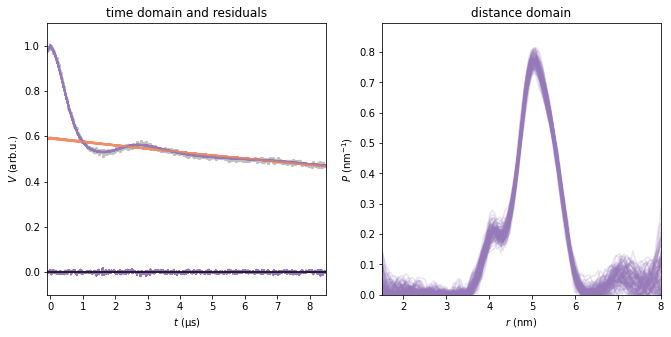

In [3]:
pars = {"method": 'regularization', "r": np.linspace(1.5,8.0,130),"bkgd_var":"Bend"}

model_s3_rmax8_Bend_dr005 = dive.model(t3, V3exp, pars)

trace_s3_rmax8 = pm.load_trace('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/Figure5/trace_s3_rmax85_dr005_4c_50s_20t_0div_rhat1.trace',model=model_s3_rmax8_Bend_dr005["model"])

dive.plotresult(trace_s3_rmax8, model_s3_rmax8_Bend_dr005, colors=['#9679B9',"#F38D68"])
fig = plt.gcf()
fig.savefig("s3_npbayes_rmax8.svg")

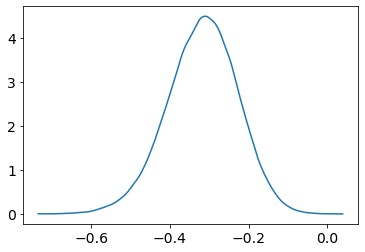

In [13]:
ax1 = az.plot_kde(trace_s3_rmax9["lg_alpha"])
#ax1.set_xlim([0.013, 0.024])
fig = plt.gcf() # to get the current figure...
fig.savefig("s3_rmax9_posteriors_lgalpha.svg") # and save it directly

## Sample 4

In [6]:
pars = {"method": 'regularization', "r": np.linspace(1.5,8.5,140),"bkgd_var":"Bend"}

model_s4_rmax85_Bend_dr005 = dive.model(t4, V4exp, pars)

trace_s4_rmax85 = pm.load_trace('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/Figure4/trace_s4_rmax85_dr005_4c_50s_20_0div_rhatbendlamb0302.trace',model=model_s4_rmax85_Bend_dr005["model"])

#dive.plotresult(trace_s4_rmax85, model_s4_rmax85_Bend_dr005, colors=["#A63A50","#F38D68"])
#fig = plt.gcf()
#fig.savefig("s4_npbayes_rmax85.svg")

Time range:          829 points (dt=0.00799035) from -0.104 µs to 6.52 µs
Distance range:      140 points (dr=0.05) from 1.5 nm to 8.5 nm
Model:              regularization


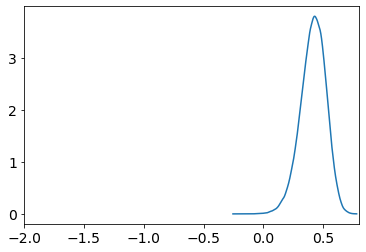

In [8]:
ax1 = az.plot_kde(trace_s4_rmax85["lg_alpha"])
ax1.set_xlim([-2, 0.8])
fig = plt.gcf() # to get the current figure...
fig.savefig("s4_rmax85_posteriors_lgalph_2.svg") # and save it directly